# Data Description:
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

   The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each 
passenger the data include information on their mileage history and on different ways they accrued or spent miles in the
last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of 
targeting different segments for different types of mileage offers

# 1.Import Necessary Libraries

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Data

In [2]:
airlines_data=pd.read_excel('EastWestAirlines (3).xlsx')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# 3. Data Understanding

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# 1.Hierarchical Clustering:
**>> IT is an algorithm that groups similar objects into groups called clusters.**

**>> It allows us to build tree structures from data similarities.**

### Normalizing The Data
**Transforming data by subtracting the minimum from every value and dividing the differences by the range is often called** 
**normalizing. The transformed data will lie within the interval [0,1].**

**>>It is common to normalize all variables before clustering**

In [6]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
#considering only numerical part of the data
df_norm = norm_func(airlines_data.iloc[:,1:])
df_norm.round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.02,0.0,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.84,0.0
1,0.01,0.0,0.00,0.0,0.0,0.00,0.02,0.00,0.00,0.84,0.0
2,0.02,0.0,0.00,0.0,0.0,0.02,0.05,0.00,0.00,0.85,0.0
3,0.01,0.0,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.84,0.0
4,0.06,0.0,0.75,0.0,0.0,0.16,0.30,0.07,0.08,0.84,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.01,0.0,0.00,0.0,0.0,0.03,0.05,0.01,0.02,0.17,1.0
3995,0.04,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.17,1.0
3996,0.04,0.0,0.50,0.0,0.0,0.10,0.09,0.00,0.00,0.17,1.0
3997,0.03,0.0,0.00,0.0,0.0,0.00,0.01,0.02,0.02,0.17,0.0


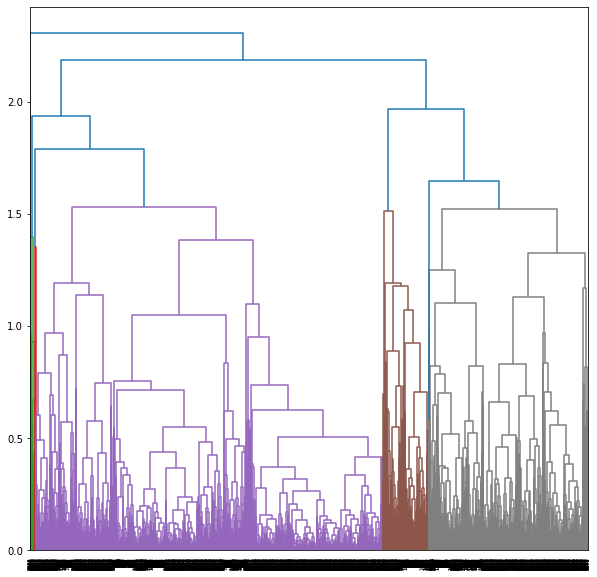

In [8]:
#Creating Dendogram
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

### Complete Linkage:
**It concentrates on maximum distance or furthest neighbor between clusters**

In [10]:
#Creating Clusters
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [11]:
#save clusters for chart
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [12]:
#creating Clusters column
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [13]:
#Adding clusters column to the dataset
airlines_data['Clusters'] = Clusters

In [14]:
airlines_data.head(50)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2


## Inference:
**We can observe that there are 3 clusters [0,1,2]**

In [15]:
airlines_data[airlines_data['Clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


### Observation:
**WE CAN OBSERVE THAT '2526' DATAPOINTS, INDEXES FALL INTO '0th CLUSTER'**

In [16]:
airlines_data[airlines_data['Clusters']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,3776,70178,0,5,1,1,61530,12,1300,6,3306,1,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,1
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,1


### Observation:
**WE CAN OBSERVE THAT '325' DATA POINTS, INDEXES FALL INTO "CLUSTER -1"**

In [17]:
airlines_data[airlines_data['Clusters']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,2
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2


### Observation:
**WE CAN OBSERVE THAT  '1144' DATAPOINTS, INDEXES FALL INTO  '2nd CLUSTER'**

# ============================================================

# 2. Kmeans Clustering / Centroid Based Clustering

### >>k-means is method of cluster analysis using a pre-specified no. of clusters.

In [18]:
from sklearn.cluster import KMeans

In [19]:
#Instead of normalization we can also use in-built function StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data=scaler.fit_transform(airlines_data.iloc[:,1:])
print(scaled_data)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ...  1.39545434e+00
  -7.66919299e-01 -7.32211506e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ...  1.37995704e+00
  -7.66919299e-01 -7.32211506e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ...  1.41192021e+00
  -7.66919299e-01 -7.32211506e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -1.31560393e+00
   1.30391816e+00  1.49873235e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -1.31608822e+00
  -7.66919299e-01 -7.32211506e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -1.31754109e+00
  -7.66919299e-01 -7.32211506e-01]]


### To find optimum number of  cluster the K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [21]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i , random_state=20)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [22]:
#It is the sum of squares of the distances of each data point in all clusters to their respective centroids. 
wcss

[47987.99999999996,
 37991.96322091061,
 33351.579845877306,
 29288.66845583177,
 25617.935147948905,
 22214.35264485821,
 20299.48078515031,
 17790.90183110223,
 16453.23585859738,
 15133.925051280094]

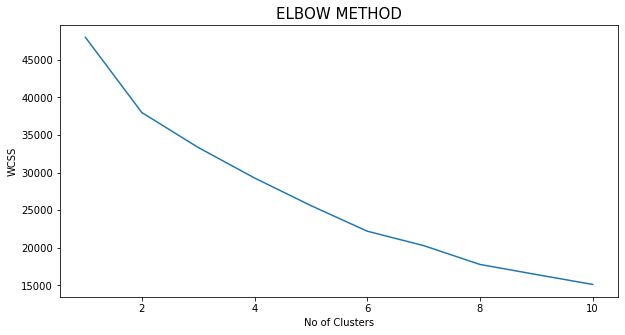

In [23]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD', size=15)
plt.xlabel('No of Clusters',size=10)
plt.ylabel('WCSS',size=10)
plt.show()

## Building Cluster algorithm

In [24]:
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=2, random_state=12)
clusters_new.fit(scaled_data)

KMeans(n_clusters=2, random_state=12)

In [25]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

## Assigning kmeans_Clusters to the data set

In [26]:
airlines_data['kmeans_clusters']=clusters_new.labels_
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,kmeans_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [27]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.20101404, -0.08004475, -0.33304848,  0.01087449, -0.04372375,
        -0.36145891, -0.32081158, -0.19359592, -0.21895479, -0.16975658,
        -0.76520857, -0.73221151],
       [ 0.30839987,  0.1228063 ,  0.51096982, -0.01668386,  0.06708187,
         0.55455768,  0.49219571,  0.29701884,  0.33592493,  0.26044403,
         1.1739987 ,  1.12337393]])

### Inference:
**Two clusters centers are formed each with 12 coordinates**

In [28]:
airlines_data.groupby('kmeans_clusters').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_clusters,,,,,,,,,,,,,
0,2203.470054,53346.536555,82.194548,1.600991,1.016109,1.003717,8416.355225,8.521272,189.014870,0.543164,3768.033044,0.000826,0.000000
1,1725.387833,104676.643853,239.113435,2.762991,1.012041,1.025349,30536.276299,16.328264,875.892269,2.647655,4656.344106,0.937262,1.663498


In [29]:
airlines_data.head(40)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,kmeans_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2,1


## Inference:
**>>With Hierarchical clustering we got [0,1,2] i.e., 3 clusters**

**>>With KMeans Clustering we got [0,1] i.e., 2 clusters**

# ===========================================================

# 3. DBSCAN Clustering

### >>Density Based Spatial Clustering of Applicatoins With Noise

### >>It is the best clustering to find the noisy data points/Outliers

In [30]:
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,kmeans_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [31]:
#removing Id column and clusters of hierarchical & KMeans to perform analysis
new_data=airlines_data.iloc[:,1:-2]
new_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [32]:
#taking the values in array bcoz it supports the values should be in array format 
array=new_data.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [33]:
dbs_scalar= StandardScaler().fit(array)
X=dbs_scalar.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### Now the values are standardized

## Applying DBSCAN Algorithm

In [34]:
from sklearn.cluster import DBSCAN
import numpy as np

In [35]:
dbscan = DBSCAN(eps=0.8, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=7)

### NOTE: 
The larger the data set we should consider more min samples and accordingly epsilon value

In [36]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
db_clusters=pd.DataFrame(dbscan.labels_,columns=['db_cluster'])
db_clusters

,db_cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [38]:
new_data1=pd.concat([new_data,db_clusters],axis=1).head(50)
new_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
5,16420,0,1,1,1,0,0,0,0,6942,0,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1


In [39]:
new_data1[new_data1['db_cluster']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
10,40091,0,2,1,1,7278,10,0,0,6959,0,0
12,43382,0,2,1,1,11150,20,0,0,6924,0,0
13,43097,0,1,1,1,3258,6,0,0,6918,0,0
14,17648,0,1,1,1,0,0,0,0,6912,0,0


In [40]:
new_data1[new_data1['db_cluster']==0].shape

(23, 12)

## Infernce:
    We can see 23 observations/data points fall into 0th cluster

In [41]:
new_data1[new_data1['db_cluster']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_cluster
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,51890,0,4,1,1,48963,16,0,0,6910,1,1
17,13958,0,1,1,1,4291,5,0,0,6905,1,1
18,91473,0,3,1,1,27408,17,0,0,6903,1,1
19,23354,0,3,1,1,10447,5,0,0,6896,1,1
20,120576,0,5,1,1,58831,23,250,2,6896,1,1
28,59763,0,3,1,1,33772,20,100,1,7907,1,1
29,19221,0,1,1,1,4655,8,500,1,7896,1,1


In [42]:
new_data1[new_data1['db_cluster']==1].shape

(15, 12)

## Infernce:
    We can see 15 observations/ datapoints fall into cluster-1

In [43]:
new_data1[new_data1['db_cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
32,276571,0,4,1,1,42044,23,0,0,7872,0,-1
35,123759,0,4,1,1,50572,23,2500,5,7865,1,-1
42,60313,0,1,1,1,10000,26,3250,9,7829,1,-1
43,619393,0,3,1,1,15008,14,0,0,7819,1,-1


In [44]:
new_data1[new_data1['db_cluster']==-1].shape

(12, 12)

### Inference:
   **WE CAN SEE 12 NOISY POINTS/OUTLIERS ARE PRESENT IN THE DATA**

# Whole Inference:

#### With DBSCAN clustering we got [0,1] i.e., 2 clusters and also -1(outliers/ noisy points)

# ===========================================================

# Visualization

In [89]:
!pip install mglearn

# DBSCAN Visualization

In [90]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


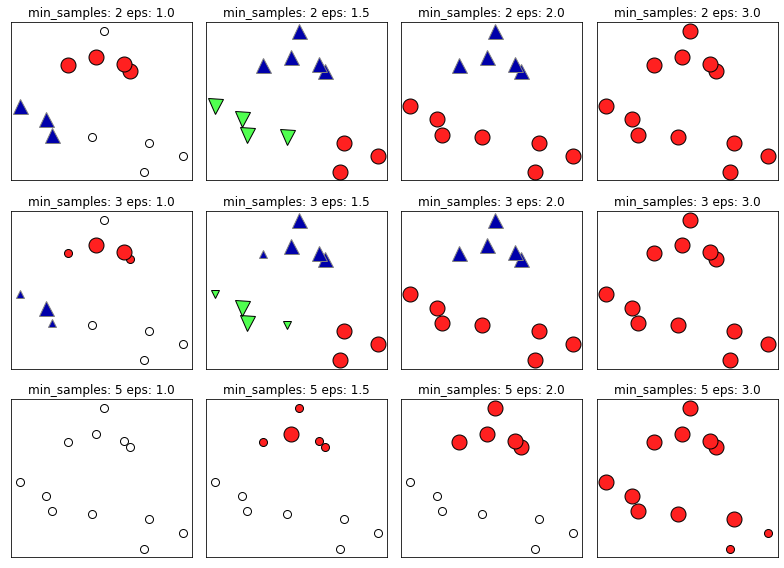

In [91]:
mglearn.plots.plot_dbscan()

# Observation:

**The points belong to clusters are solid, while noisy points are shown  in white**

#As we increase the episilon value from left to right we can obberve that more points are including into the cluster.

#Core samples are shown as Large Markers,

#Boundary points are displayed as smaller markers